In [1]:
import numpy as np
import matplotlib.pyplot as plt

Interpolamos el $\Phi$ real en los tiempos que calculamos el $\Phi$ con SIC:

In [2]:
T_REAL_PHI_FILE = "../Mediciones/t1_pps_aligned.bin" 
REAL_PHI_FILE = "../Mediciones/real_phi.bin"
T_SIC_PHI_FILE = "../Mediciones/t1.bin"

In [3]:
t_real_phi = np.fromfile(T_REAL_PHI_FILE)
real_phi = np.fromfile(REAL_PHI_FILE)
t_sic_phi = np.fromfile(T_SIC_PHI_FILE)

real_phi = np.interp(t_sic_phi,t_real_phi,real_phi)

real_phi.tofile("../Mediciones/real_phi_interp.bin")

In [4]:
from calc_mtie import mtie_calc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
MTIE_WINDOW = 60
REAL_PHI_FILE = '../Mediciones/real_phi_interp.bin'
SIC_PHI_FILE = '../Mediciones/sic_phi.bin'
T_PPS_FILE = '../Mediciones/t1.bin'

In [6]:
real_phi = np.fromfile(REAL_PHI_FILE)
sic_phi = np.fromfile(SIC_PHI_FILE)
t_pps = np.fromfile(T_PPS_FILE)

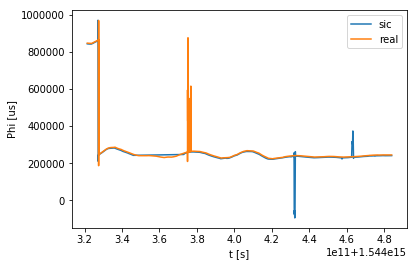

In [7]:
plt.plot(t_pps, sic_phi)
plt.plot(t_pps, real_phi)
plt.xlabel('t [s]')
plt.ylabel('Phi [us]')
plt.legend(('sic','real'));

In [8]:
te = sic_phi - real_phi

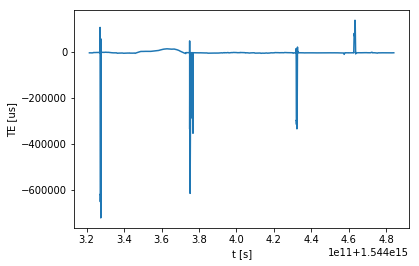

In [9]:
plt.plot(t_pps,te)
plt.xlabel('t [s]')
plt.ylabel('TE [us]');

In [10]:
tie, mtie = mtie_calc(te, MTIE_WINDOW)

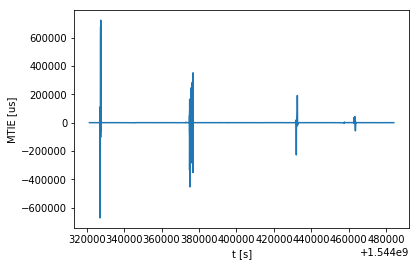

In [11]:
plt.plot(t_pps[:-MTIE_WINDOW]/1e6, tie)
plt.xlabel('t [s]')
plt.ylabel('MTIE [us]');

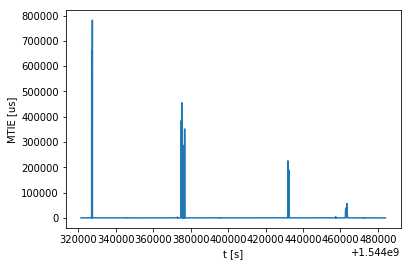

In [12]:
plt.plot(t_pps[:-MTIE_WINDOW]/1e6,mtie)
plt.xlabel('t [s]')
plt.ylabel('MTIE [us]');

Sacamos los picos, mayores a un threshold 

In [13]:
threshold = 100000

In [14]:
#mtie = np.clip(mtie,0,threshold)

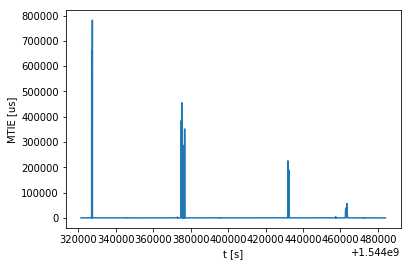

In [15]:
plt.plot(t_pps[:-MTIE_WINDOW]/1e6,mtie)
plt.xlabel('t [s]')
plt.ylabel('MTIE [us]');

In [16]:
perc = np.percentile(mtie, 90)
perc

184.03698625721447

In [17]:
np.median(mtie)

47.358023451437475

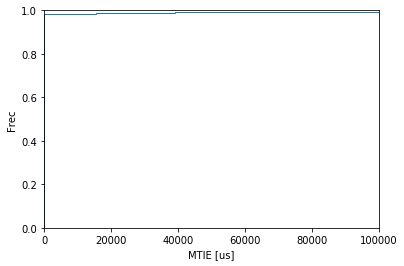

In [18]:
plt.hist(mtie, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel('MTIE [us]')
plt.ylabel('Frec')
plt.ylim([0,1])
plt.xlim([0, threshold]);

__OTRA FORMA, SIN BINS:__

In [19]:
def histogram_no_bins(x):
    # esto nos da los valores únicos de MTIE, y cuántas veces aparece cada uno (frecuencia)
    values, frequencies = np.unique(x, return_counts = True)
    # suma acumulada
    histogram = np.cumsum(frequencies)
    histogram = histogram/histogram[-1]
    return values, histogram

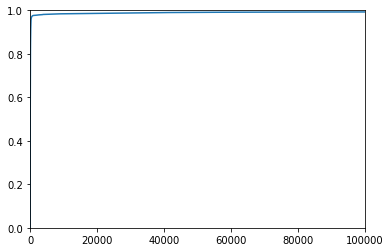

In [20]:
val, hist = histogram_no_bins(mtie)
plt.plot(val, hist)
plt.ylim([0,1])
plt.xlim([0,threshold]);

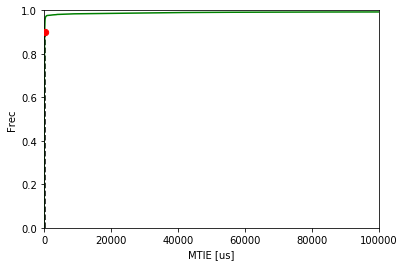

In [21]:
plt.plot(val,hist,c='g')
plt.xlabel('MTIE [us]')
plt.ylabel('Frec')
plt.vlines(perc,0,0.90,linestyles='dashed')
plt.hlines(0.90,0,perc,linestyles='dashed')
plt.scatter([perc],[0.90],s=40,c='r',marker='o',zorder=3)
plt.ylim([0,1])
plt.xlim([0,threshold]);

__OTRA FORMA DE CALCULAR EL MTIE:VENTANAS FIJAS, COMO EN EL ORIGINAL, EN VEZ DE 1 VENTANA QUE SE DESLIZA.__

In [22]:
from calc_mtie import mtie_calc_2

tie, mtie_2 = mtie_calc_2(te, MTIE_WINDOW)
mtie_2 = np.clip(mtie,0,threshold)

In [23]:
val_2, hist_2 = histogram_no_bins(mtie_2)

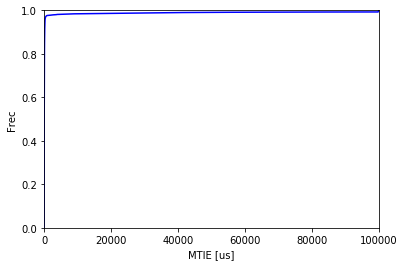

In [24]:
plt.plot(val_2,hist_2,c='b')
plt.xlabel('MTIE [us]')
plt.ylabel('Frec')
plt.ylim([0,1])
plt.xlim([0,threshold]);

In [25]:
perc = np.percentile(mtie_2,90)
perc

184.03698625721447

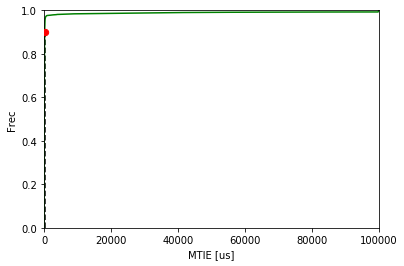

In [26]:
plt.plot(val_2,hist_2,c='g')
plt.xlabel('MTIE [us]')
plt.ylabel('Frec')
plt.vlines(perc,0,0.90,linestyles='dashed')
plt.hlines(0.90,0,perc,linestyles='dashed')
plt.scatter([perc],[0.90],s=40,c='r',marker='o',zorder=3)
plt.ylim([0,1])
plt.xlim([0,threshold]);

Da un poco mejor, pero no es tan representativo porque no recorre TODAS las ventanas de 60 segundos